### import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
# %matplotlib ipympl
from matplotlib.animation import FuncAnimation

###  gradient descent for 1d domain

In [2]:
def gradient_descent_1d(cost, gradient,start_here,max_iterations, learning_rate=0.1 ):
    """
    - cost: function to optimise
    - gradient: derivative of cost function
    - start_here: starting point of the process
    - max_iterations: number of iterations to run
    - learning_rate: size of each step
    """
    
    # define lists that contain points that show gradient descent.
    bestx_values = []
    besty_values = []
    
    # need to plot the function too
    
    current_point = start_here
    bestx_values.append(current_point)
    besty_values.append(cost(current_point))
    
    for _ in range(max_iterations):
        
        # update current_point
        current_point = current_point - learning_rate * gradient(current_point)
        bestx_values.append(current_point)
        besty_values.append(cost(current_point))   
        
    optimum_value = current_point
        
    return optimum_value, bestx_values, besty_values


### question 1

In [3]:
def f1(x):
    return x ** 2 + 3 * x + 8
def df1_dx(x):
    return 2*x + 3
search_space_q1 = (-5,5)

### question1 results

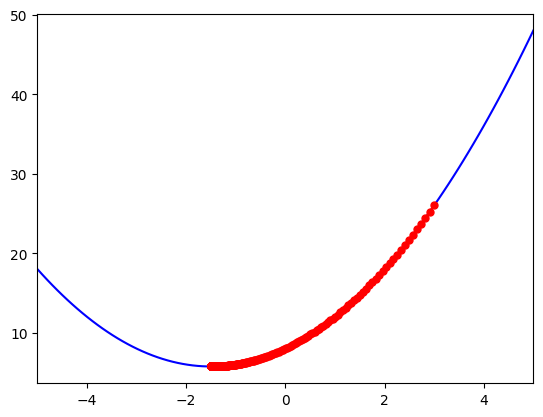

optimum occurs at
          x = -1.499999992426647,
          y = 5.75,
          df1_dx(x) = 1.5146706111579533e-08


In [4]:
def execute_q1():
    optimum_value, x_values, y_values = gradient_descent_1d(f1, df1_dx, start_here = 3,
                                                            max_iterations = 1000, learning_rate = 0.01)

    fig, ax = plt.subplots()

    #plot f1
    xlim = search_space_q1
    x_axis = np.linspace(xlim[0], xlim[1], 100)
    y_axis = f1(x_axis)
    ax.set_xlim(xlim[0], xlim[1])
    ax.plot(x_axis, y_axis, color = "blue")

    #plot the descent points
    ax.plot(x_values, y_values, marker = "o", markersize = "5", color = "red")

    plt.show()

    print(f"""optimum occurs at
          x = {optimum_value},
          y = {f1(optimum_value)},
          df1_dx(x) = {df1_dx(optimum_value)}""")
execute_q1()

### question 3 

In [5]:
#too lazy to write np.pi
pi = np.pi

def f5(x):
    return np.cos(x)**4 - np.sin(x)**3 - 4*np.sin(x)**2 + np.cos(x) + 1
def df5_dx(x):
    def c(x):
        return np.cos(x)
    def s(x):
        return np.sin(x)
    
    derivative = 4 * c(x)**3 * (-s(x)) - 3*s(x)**2*c(x) - 8*s(x)*c(x) - s(x)
    return derivative

search_space_q3 = (0,2*pi)


### question 3 results

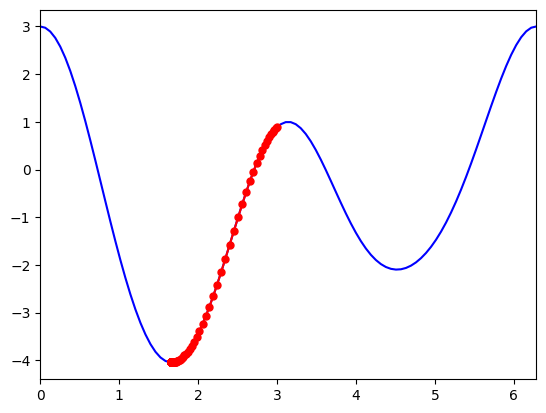

optimum occurs at
          x = 1.66166081204379,
          y = -4.045412051572553,
          df5_dx(x) = 9.547918011776346e-15


In [6]:
def execute_q3():
    optimum_value, x_values, y_values = gradient_descent_1d(f5, df5_dx, start_here = 3,
                                                            max_iterations = 1000, learning_rate = 0.01)

    fig, ax = plt.subplots()

    #plot f1
    xlim = search_space_q3
    x_axis = np.linspace(xlim[0], xlim[1], 100)
    y_axis = f5(x_axis)
    ax.set_xlim(xlim[0], xlim[1])
    ax.plot(x_axis, y_axis, color = "blue")

    #plot the descent points
    ax.plot(x_values, y_values, marker = "o", markersize = "5", color = "red")

    plt.show()

    print(f"""optimum occurs at
          x = {optimum_value},
          y = {f5(optimum_value)},
          df5_dx(x) = {df5_dx(optimum_value)}""")
execute_q3()

### gradient descent for 2d domain

In [7]:
def gradient_descent_2d(cost, gradient_x, gradient_y, start_here, max_iterations=1000, learning_rate=0.01):
    """
    parameters:
    
    cost: function to be optimised
    gradient: returns the partial derivatives along the x and the y directions.
    start_here: list of coordinates of the point where the optimization starts.
    max_iterations: no of steps 
    learning_rate: size of each step
    
    returns:
    
    - coordiantes of the optimal value
    - list of best points.
    """
    
    #initate lists that contain the best coordinates
    best_points = []
    
    current_point = [start_here[0], start_here[1], cost(start_here[0],start_here[1])]
    


    best_points.append(current_point)
    
#     bestx_values.append(current_point_x)
#     besty_values.append(current_point_y)
#     bestz_values.append(current_point_z)
    
    for _ in range(max_iterations):
    
        # perform gradient descent
        # update current point
        
        current_point_x = current_point[0]
        current_point_y = current_point[1]
        current_point_z = current_point[2]
        
        new_x = current_point_x - learning_rate*gradient_x(current_point_x,current_point_y)
        new_y = current_point_y - learning_rate*gradient_y(current_point_x,current_point_y)   
        new_z = cost(new_x,new_y)
        current_point = [new_x, new_y, new_z]

        best_points.append(current_point)
        
    optimum_point = current_point
        
    return optimum_point, best_points
    
    

### question 2

In [8]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4


### question 2 results

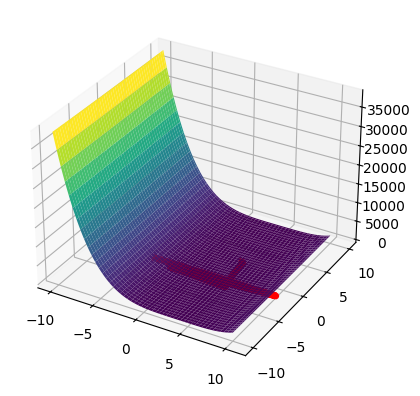

[4.111016496652788, 1.9999999915851632, 2.0001518973064094]


In [9]:
starting_point = [-3,-3]
optimum_point, best_points = gradient_descent_2d(f3, df3_dx, df3_dy,starting_point)

x_axis = np.linspace(xlim3[0], xlim3[1], 100)
y_axis = np.linspace(ylim3[0], ylim3[1], 100)
X, Y = np.meshgrid(x_axis, y_axis)
Z = f3(X,Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(X,Y,Z, cmap = "viridis")


# now plot the best points
x_coordinates = [x[0] for x in best_points]
y_coordinates = [x[1] for x in best_points]
z_coordinates = [x[2] for x in best_points]

ax.plot(x_coordinates, y_coordinates, z_coordinates, color = "red", lw = 5.0)


plt.show()

print(optimum_point)


### question 3

In [10]:
xlim4 = [-np.pi, np.pi]
ylim4 = [-np.pi, np.pi]
def f4(x,y):
    return np.exp(-(x - y)**2) * np.sin(y)

def df4_dx(x, y):
    return -2 * np.exp(-(x - y)**2) * np.sin(y) * (x - y)

def df4_dy(x, y):
    return np.exp(-(x - y)**2) * np.cos(y) + 2 * np.exp(-(x - y)**2) * np.sin(y)*(x - y)


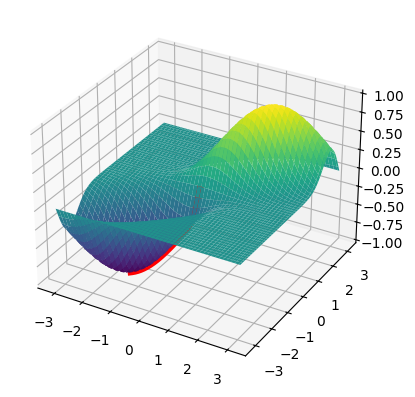

[-1.5405230227666784, -1.5471609991171154, -0.9996766491925194]


In [11]:
starting_point = [0,0]
optimum_point, best_points = gradient_descent_2d(f4, df4_dx, df4_dy,starting_point)

x_axis = np.linspace(xlim4[0], xlim4[1], 100)
y_axis = np.linspace(ylim4[0], ylim4[1], 100)
X, Y = np.meshgrid(x_axis, y_axis)
Z = f4(X,Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(X,Y,Z, cmap = "viridis")


# now plot the best points
x_coordinates = [x[0] for x in best_points]
y_coordinates = [x[1] for x in best_points]
z_coordinates = [x[2] for x in best_points]

ax.plot(x_coordinates, y_coordinates, z_coordinates, color = "red", lw = 5.0)


plt.show()

print(optimum_point)
